In [1]:
# sudo pip3 install sklearn --user
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#df = pd.read_csv("demo_dataset.csv")
df = pd.read_csv("datasets/Accidents_2015.csv",low_memory=False)
df.shape



(140056, 32)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
Accident_Index                                 140056 non-null object
Location_Easting_OSGR                          140029 non-null float64
Location_Northing_OSGR                         140029 non-null float64
Longitude                                      140029 non-null float64
Latitude                                       140029 non-null float64
Police_Force                                   140056 non-null int64
Accident_Severity                              140056 non-null int64
Number_of_Vehicles                             140056 non-null int64
Number_of_Casualties                           140056 non-null int64
Date                                           140056 non-null object
Day_of_Week                                    140056 non-null int64
Time                                           140038 non-null object
Local_Authority_(District)                     140

In [3]:
df.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.433536,0.999376,-0.435568,-0.379046,0.051229,0.015593,-0.036257,-0.004499,-0.403176,...,-0.019798,-0.021023,0.073373,-0.000086,-0.044503,-0.099444,-0.028257,-0.006911,-0.119557,0.008674
Location_Northing_OSGR,-0.433536,1.000000,-0.443053,0.999973,0.178804,-0.037594,-0.028368,0.032868,0.004241,0.136146,...,0.039089,0.024939,-0.026478,-0.010714,0.038591,0.097183,0.026539,0.005641,0.061463,-0.002112
Longitude,0.999376,-0.443053,1.000000,-0.444983,-0.391877,0.051015,0.016510,-0.035038,-0.004551,-0.412802,...,-0.017833,-0.021823,0.071890,-0.000449,-0.045083,-0.100588,-0.028154,-0.007234,-0.117743,0.009928
Latitude,-0.435568,0.999973,-0.444983,1.000000,0.176864,-0.037748,-0.028174,0.032994,0.004232,0.134562,...,0.039909,0.024918,-0.026428,-0.010694,0.038510,0.097023,0.026522,0.005536,0.061004,-0.001855
Police_Force,-0.379046,0.178804,-0.391877,0.176864,1.000000,-0.060330,-0.001503,0.013854,-0.001045,0.980276,...,-0.014242,0.023864,-0.079578,0.016417,0.048854,0.107323,0.030003,0.020449,0.255343,-0.005329
Accident_Severity,0.051229,-0.037594,0.051015,-0.037748,-0.060330,1.000000,0.070972,-0.065201,0.001485,-0.066088,...,0.018365,-0.003231,0.019140,-0.056668,0.009914,-0.008049,-0.000891,-0.002597,-0.093708,0.105744
Number_of_Vehicles,0.015593,-0.028368,0.016510,-0.028174,-0.001503,0.070972,1.000000,0.259028,0.001150,0.003504,...,0.016967,-0.019797,-0.051322,-0.071423,-0.035099,-0.052428,-0.014050,-0.041696,0.048217,-0.042326
Number_of_Casualties,-0.036257,0.032868,-0.035038,0.032994,0.013854,-0.065201,0.259028,1.000000,0.002011,0.021496,...,-0.002794,-0.008920,-0.030250,0.025691,-0.003800,0.022953,0.014087,0.006049,0.120625,-0.104572
Day_of_Week,-0.004499,0.004241,-0.004551,0.004232,-0.001045,0.001485,0.001150,0.002011,1.000000,-0.001342,...,-0.001332,0.000974,0.003795,0.007598,-0.012242,-0.023947,-0.003664,-0.006778,-0.016735,0.007277
Local_Authority_(District),-0.403176,0.136146,-0.412802,0.134562,0.980276,-0.066088,0.003504,0.021496,-0.001342,1.000000,...,-0.011025,0.022863,-0.093215,0.015149,0.051972,0.107445,0.032315,0.020050,0.270704,0.000439


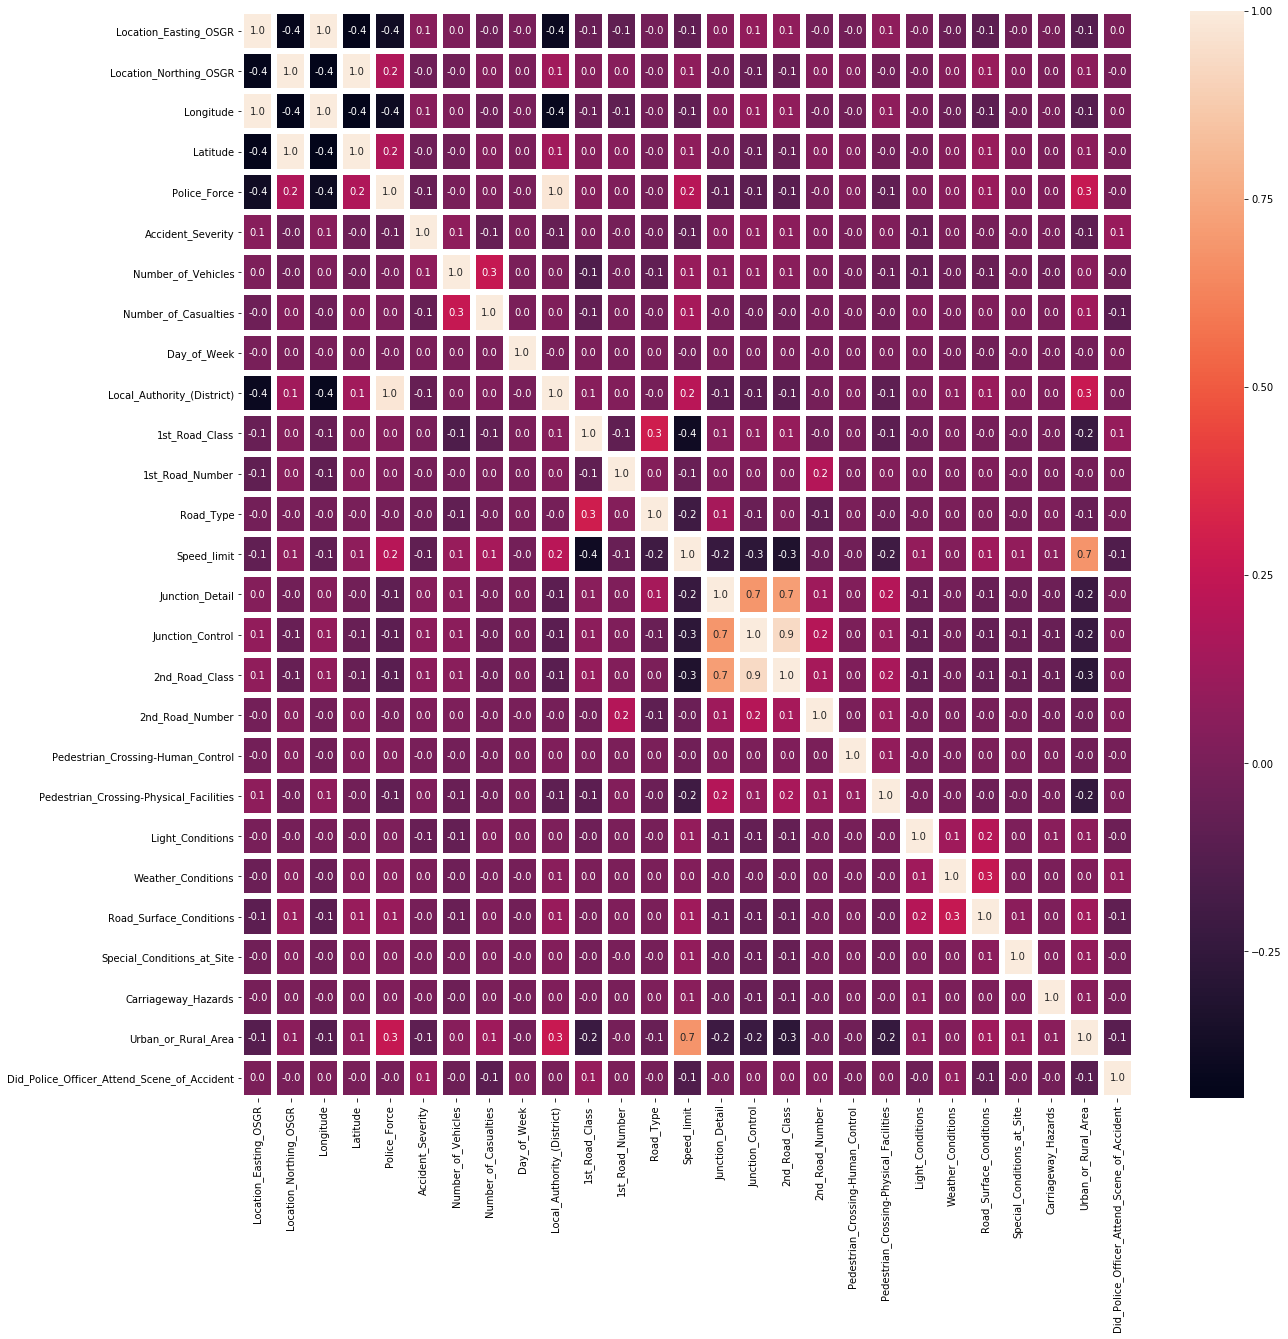

In [4]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)

In [5]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

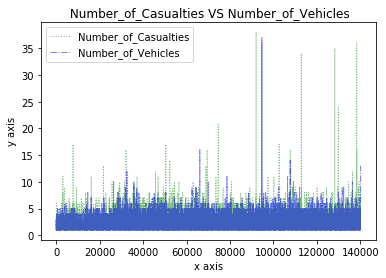

In [6]:
#Line Plot
df.Number_of_Casualties.plot(kind='line',color ='g',label='Number_of_Casualties',linewidth=1,alpha=0.5,grid=True,linestyle= ':')
df.Number_of_Vehicles.plot(color='blue',label='Number_of_Vehicles',linewidth=1,alpha=0.5,linestyle='-.')
plt.legend(loc='upper left')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title(' Number_of_Casualties VS Number_of_Vehicles')
plt.show()

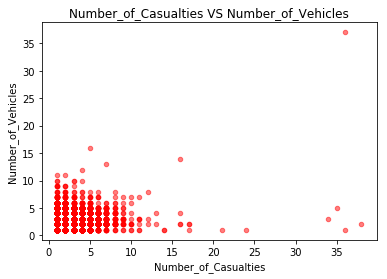

In [7]:
#Scatter Plot
df.plot(kind='scatter',x='Number_of_Casualties',y='Number_of_Vehicles',alpha=0.5,color='red')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Number_of_Vehicles')
plt.title('Number_of_Casualties VS Number_of_Vehicles')
plt.show()

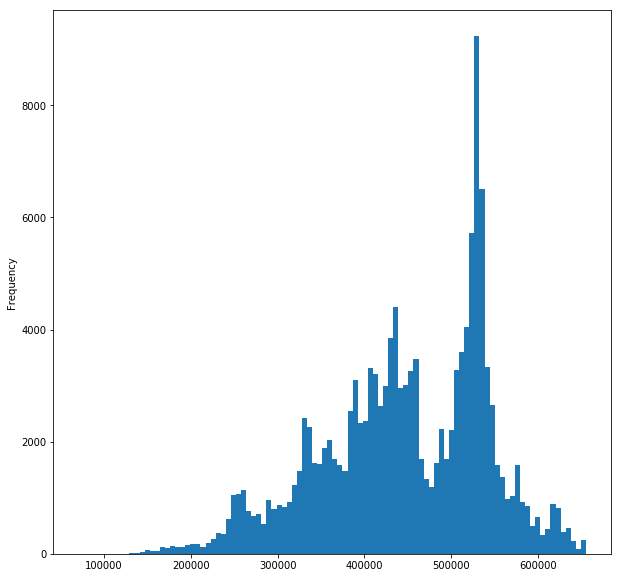

In [8]:
#Histogram
df.Location_Easting_OSGR.plot(kind='hist',bins=100,figsize=(10,10))
plt.show()

In [9]:
df = df[(df['LSOA_of_Accident_Location']=='E01004736')]
print(len(df))
df.head()

140


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
926,201501CW10006,530020.0,180360.0,-0.127933,51.507221,1,3,2,1,13/01/2015,...,0,5,1,1,1,0,0,1,1,E01004736
951,201501CW10040,529720.0,180340.0,-0.132261,51.507111,1,3,2,1,20/01/2015,...,0,1,1,1,1,0,0,1,1,E01004736
966,201501CW10059,529200.0,180440.0,-0.139713,51.508128,1,3,2,1,24/01/2015,...,0,5,4,1,1,0,0,1,1,E01004736
968,201501CW10061,529790.0,180400.0,-0.131231,51.507634,1,3,2,2,25/01/2015,...,0,5,4,1,1,0,0,1,1,E01004736
989,201501CW10097,529650.0,180820.0,-0.133093,51.511440,1,3,2,2,31/01/2015,...,0,5,1,2,2,0,0,1,1,E01004736


In [10]:
location = df['Latitude'].mean(), df['Longitude'].mean()


In [11]:
# import sys
# !{sys.executable} -m pip install folium
# sudo pip3 install folium --user

In [12]:
import folium
#A basemap is then created using the location to centre on and the zoom level to start.
m = folium.Map(location=location,zoom_start=15)

In [13]:
df=df.dropna(subset=['Longitude'])


In [14]:
df=df.dropna(subset=['Latitude'])

In [15]:
df[df.isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for i in range(0,len(df)):
       
    popup = folium.Popup('Accident', parse_html=True) 
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]],popup=popup).add_to(m)
m

In [17]:
df['Number_of_Casualties'].value_counts()

1    123
2     14
4      2
3      1
Name: Number_of_Casualties, dtype: int64

In [18]:
location = df['Latitude'].mean(), df['Longitude'].mean()
m = folium.Map(location=location,zoom_start=15)

#The num of casulaties for each accident can be determined and the colour assigned then added to the basemap.
for i in range(0,len(df)):
    num_of_casualties = df['Number_of_Casualties'].iloc[i]
    if num_of_casualties == 1:
        color = 'blue'
    elif num_of_casualties == 2:
        color = 'green'
    else:
        color = 'red'
    
    popup = folium.Popup('Accident', parse_html=True) 
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]],popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(m)

m

In [19]:
def fancy_html(row):
    i = row
    
    Number_of_Vehicles = df['Number_of_Vehicles'].iloc[i]                             
    Number_of_Casualties = df['Number_of_Casualties'].iloc[i]                           
    Date = df['Date'].iloc[i]
    Time = df['Time'].iloc[i]                                           
    Light_Conditions = df['Light_Conditions'].iloc[i]                               
    Weather_Conditions = df['Weather_Conditions'].iloc[i]                             
    Road_Surface_Conditions = df['Road_Surface_Conditions'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""".format(Date) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Number of Vehicles</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Number_of_Vehicles) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Casualties</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Number_of_Casualties) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Time</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Time) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Light Conditions</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Light_Conditions) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Weather Conditions</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Weather_Conditions) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Road Conditions</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Road_Surface_Conditions) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [20]:
import branca
location = df['Latitude'].mean(), df['Longitude'].mean()
m = folium.Map(location=location,zoom_start=15,min_zoom=5)

for i in range(0,len(df)):
    html = fancy_html(i)
 
    iframe = branca.element.IFrame(html=html,width=400,height=300)
    popup = folium.Popup(iframe,parse_html=True)
    
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]],
                  popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(m)

m

In [21]:
data_heat = df[['Latitude','Longitude','Number_of_Casualties']].values.tolist()

In [22]:
data_heat[0]

[51.507221, -0.127933, 1.0]

In [23]:
import folium.plugins as plugins

m = folium.Map(location=location, zoom_start=15)
#tiles='stamentoner'

plugins.HeatMap(data_heat).add_to(m)

m